In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [156]:
df = pd.read_csv('/content/dia.csv')

In [157]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [158]:
df.tail()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
755,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,0,0,0,0,0,0,0,1,0
756,764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,0,1,0,0,0,1,0,0,1,0
757,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,0,0,1,0,1,0,0,1,0
758,766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,0,0,0,0,0,0,0,1,0
759,767,1,93.0,70.0,31.0,102.5,30.4,0.315,23,0,1,0,0,0,0,1,0,1,0,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                760 non-null    int64  
 1   Pregnancies               760 non-null    int64  
 2   Glucose                   760 non-null    float64
 3   BloodPressure             760 non-null    float64
 4   SkinThickness             760 non-null    float64
 5   Insulin                   760 non-null    float64
 6   BMI                       760 non-null    float64
 7   DiabetesPedigreeFunction  760 non-null    float64
 8   Age                       760 non-null    int64  
 9   Outcome                   760 non-null    int64  
 10  NewBMI_Obesity 1          760 non-null    int64  
 11  NewBMI_Obesity 2          760 non-null    int64  
 12  NewBMI_Obesity 3          760 non-null    int64  
 13  NewBMI_Overweight         760 non-null    int64  
 14  NewBMI_Und

In [160]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,384.105263,3.867105,121.543421,72.382895,28.889474,133.565789,32.321447,0.469218,33.205263,0.346053,0.307895,0.197368,0.123684,0.232895,0.005263,0.644737,0.014474,0.234211,0.376316,0.375000
std,221.978187,3.367984,30.326388,11.724864,8.377043,58.023446,6.619907,0.325072,11.623200,0.476023,0.461927,0.398275,0.329438,0.422954,0.072404,0.478908,0.119511,0.423783,0.484780,0.484442
min,0.000000,0.000000,44.000000,30.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.750000,1.000000,100.000000,64.000000,25.000000,102.500000,27.500000,0.242500,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.370000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,575.250000,6.000000,140.000000,80.000000,32.000000,169.500000,36.500000,0.626250,41.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,767.000000,17.000000,199.000000,114.000000,60.000000,270.000000,57.300000,2.329000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
df.isnull().sum()

,0
Unnamed: 0,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [162]:
df.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret'],
      dtype='object')

In [163]:
df.shape

(760, 20)

In [164]:
df.duplicated().sum()

0

In [165]:
df['Pregnancies']

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
755,10
756,2
757,5
758,1


In [166]:
df[(df['Pregnancies'] > 5) & (df['Glucose'] > 122)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
9,9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,1,0,0,0,0,0,0,0,1,0
11,11,10,168.0,74.0,32.0,169.5,38.0,0.537,34,1,0,1,0,0,0,0,0,0,0,1
12,12,10,139.0,80.0,27.0,102.5,27.1,1.441,57,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,749,6,162.0,62.0,32.0,169.5,24.3,0.178,50,1,0,0,0,0,0,0,0,0,0,1
746,754,8,154.0,78.0,32.0,169.5,32.4,0.443,45,1,1,0,0,0,0,0,0,0,0,1
748,756,7,137.0,90.0,41.0,102.5,32.0,0.391,39,0,1,0,0,0,0,1,0,0,0,1
751,759,6,190.0,92.0,32.0,169.5,35.5,0.278,66,1,0,1,0,0,0,0,0,0,0,1


In [167]:
per = np.percentile(df['BMI'], 50)
per

32.0

In [168]:
per = np.percentile(df['BloodPressure'], 75)
per


80.0

In [169]:
mean = np.mean(df['Insulin'])
mean

133.56578947368422

In [170]:
min = np.min(df['Age'])
min

21

In [171]:
max = np.max(df['Age'])
max

72

In [172]:
std = np.std(df['DiabetesPedigreeFunction'])
std

0.32485774567312176

In [173]:
std = np.std(df.select_dtypes(include=np.number))
std

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
Unnamed: 0,221.832101
Pregnancies,3.365768
Glucose,30.306430
BloodPressure,11.717148
SkinThickness,8.371530
Insulin,57.985260
BMI,6.615550
DiabetesPedigreeFunction,0.324858
Age,11.615551
Outcome,0.475710


In [174]:
cv = np.std(df.select_dtypes(include=np.number)) / np.mean(df.select_dtypes(include=np.number))
cv

,0
Unnamed: 0,5.455730
Pregnancies,0.082778
Glucose,0.745355
BloodPressure,0.288171
SkinThickness,0.205889
Insulin,1.426087
BMI,0.162703
DiabetesPedigreeFunction,0.007990
Age,0.285672
Outcome,0.011700


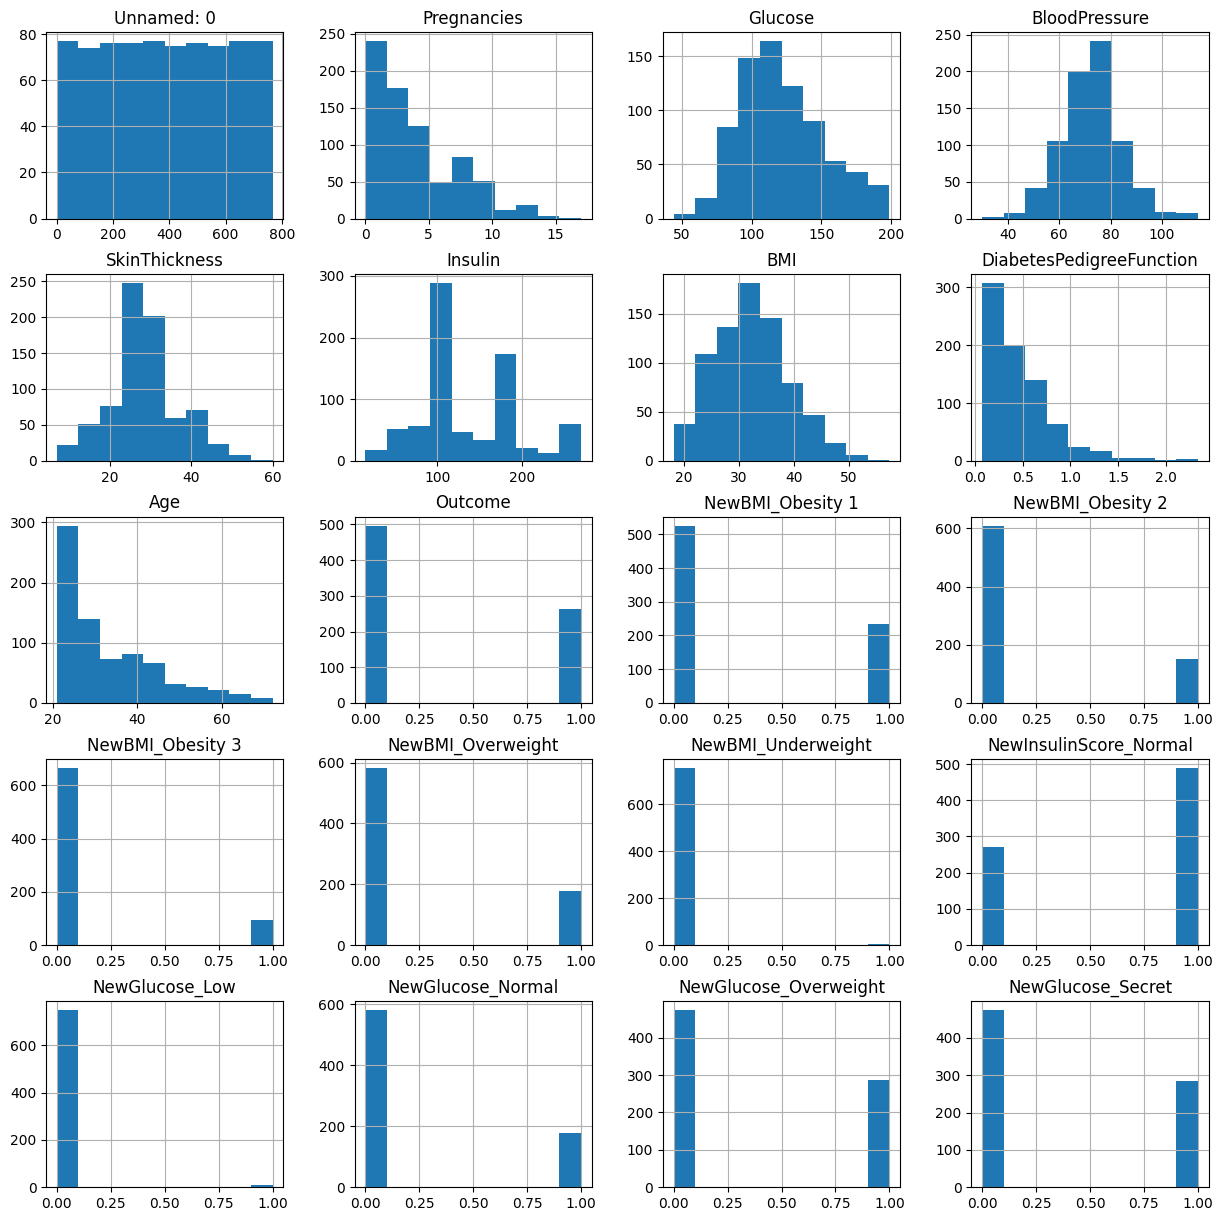

In [175]:
df.hist(figsize = (15,15));


In [176]:
var = np.var(df.select_dtypes(include=np.number))
var

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
Unnamed: 0,49209.481025
Pregnancies,11.328392
Glucose,918.479694
BloodPressure,137.291550
SkinThickness,70.082521
Insulin,3362.290409
BMI,43.765501
DiabetesPedigreeFunction,0.105533
Age,134.921025
Outcome,0.226300


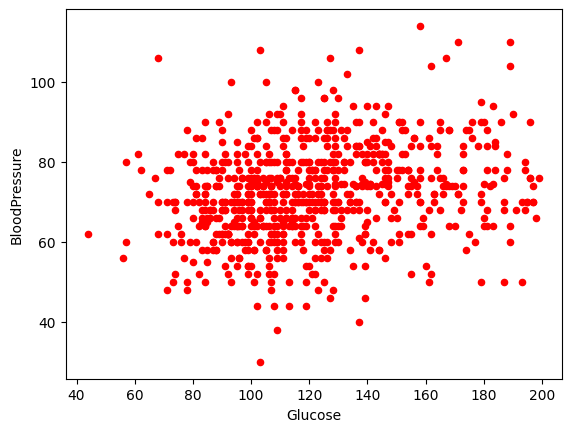

In [177]:
df.plot(x = 'Glucose', y = 'BloodPressure', kind = 'scatter', color = 'red')
plt.show()

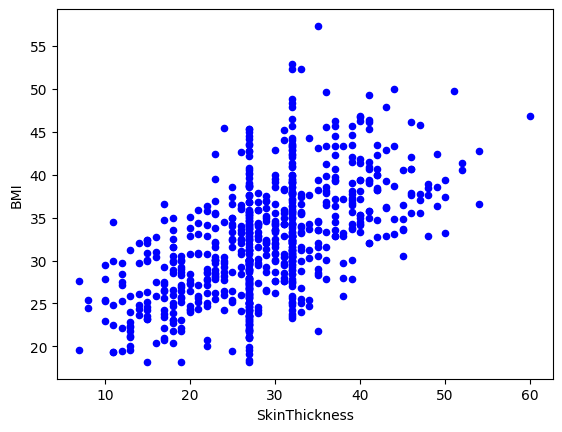

In [178]:
df.plot(x = 'SkinThickness', y = 'BMI', kind = 'scatter', color = 'blue')
plt.show()

In [179]:
df1 = round(df['DiabetesPedigreeFunction'].corr(df['Age']),2)
df1

0.04

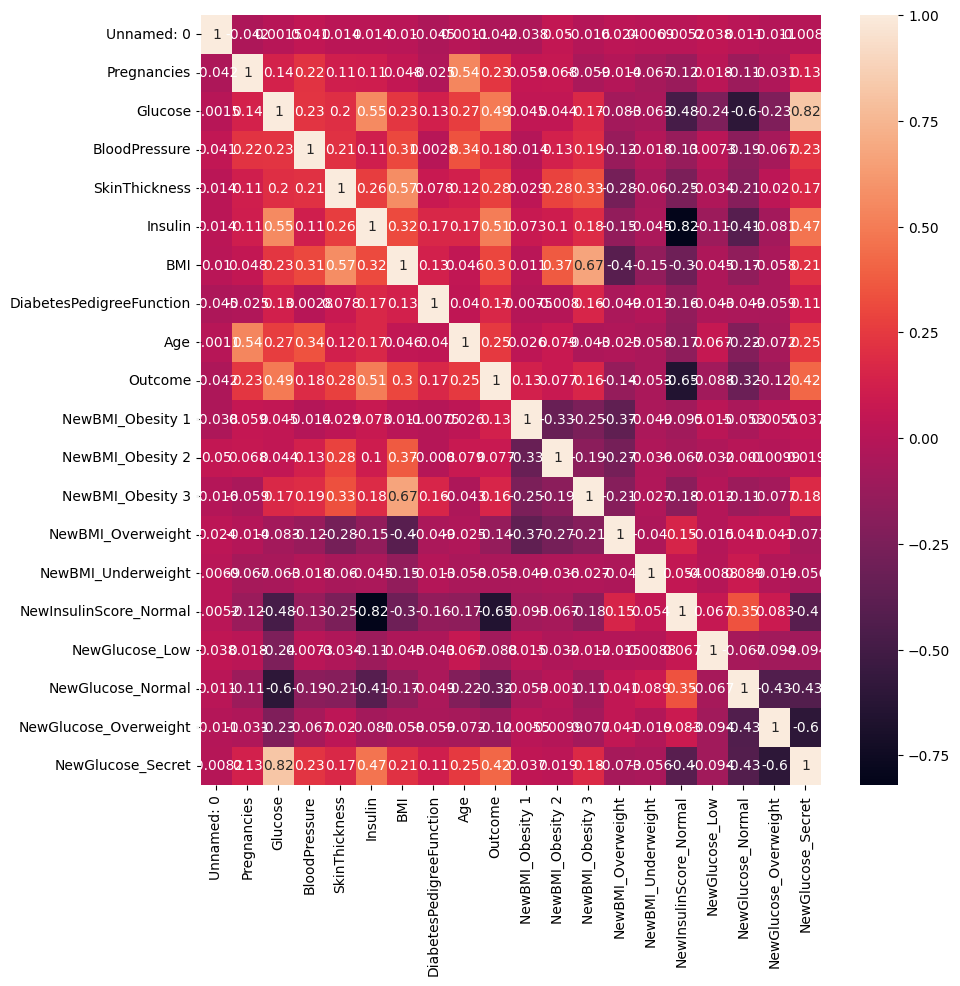

In [180]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.show()

<ipython-input-181-18f639b787c2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BMI',data=df, palette="PuRd")


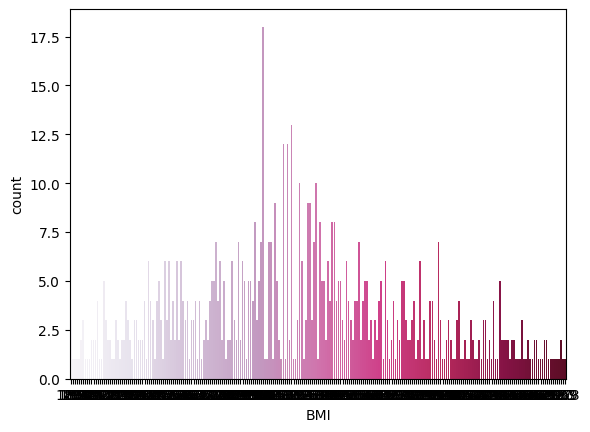

In [181]:
ax = sns.countplot(x='BMI',data=df, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

<ipython-input-182-f361ad73272f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DiabetesPedigreeFunction',data=df, palette="PuRd")


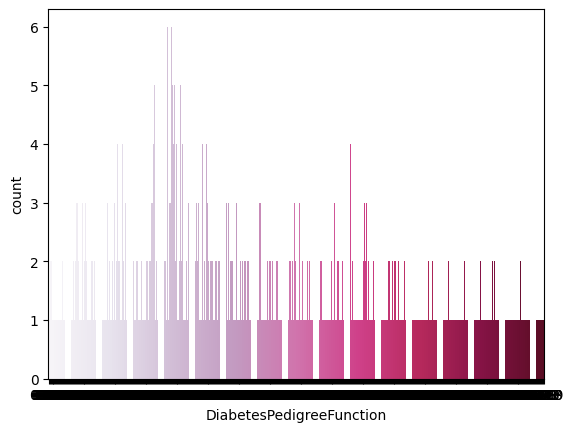

In [182]:
ax = sns.countplot(x='DiabetesPedigreeFunction',data=df, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

Glucose
99.0     17
100.0    17
106.0    14
111.0    14
107.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 135, dtype: int64


<Axes: xlabel='Glucose', ylabel='count'>

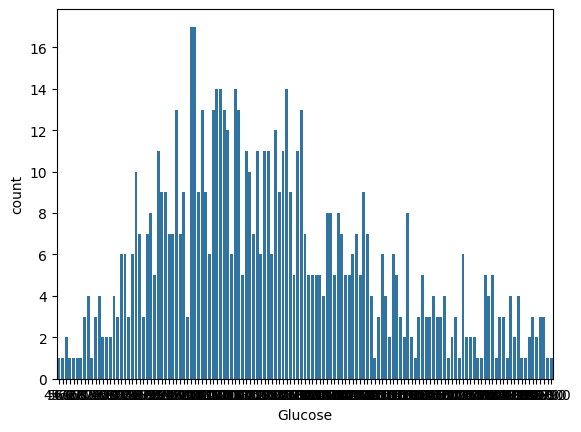

In [183]:
print(df['Glucose'].value_counts())
sns.countplot(x = 'Glucose', data = df)

Insulin
102.5    235
169.5    137
270.0     52
105.0     11
140.0      9
        ... 
89.0       1
84.0       1
72.0       1
59.0       1
112.0      1
Name: count, Length: 140, dtype: int64


<Axes: xlabel='Insulin', ylabel='count'>

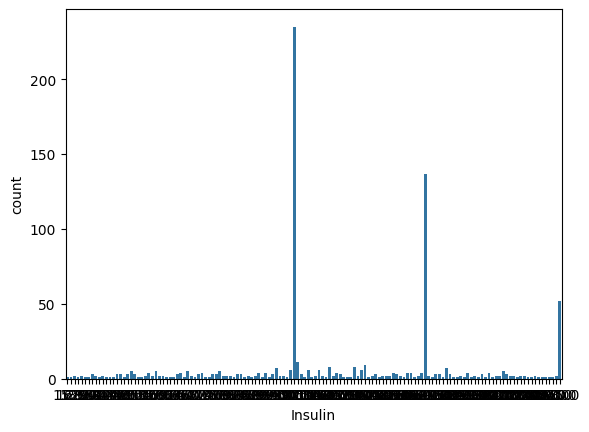

In [184]:
print(df['Insulin'].value_counts())
sns.countplot(x = 'Insulin', data = df)

In [188]:
x = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [189]:
accuracy = {}
algo_time = {}
r2_score = {}
mean_squared_error = {}
roc_auc_score = {}

In [190]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_score[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_error[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_score[clf_name]=r2_score(yt,y_pred)*100
    accuracy[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_score[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_error[clf_name],"%")
    print("\nR2 score is :",r2_score[clf_name],"%")
    print("\nAccuracy Score :",accuracy[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [191]:
clf = LogisticRegression(random_state=0, max_iter = 200)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc * 100)

Accuracy: 75.0


In [192]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [193]:
svc = SVC ()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",round(accuracy * 100, 2))

Accuracy Score: 84.21


In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
kkn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
kkn.fit(x_train, y_train)
y_pred = kkn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy', acc * 100)

Accuracy 83.55263157894737


In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy', acc * 100)

Accuracy 86.18421052631578


In [198]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy', acc * 100)

Accuracy 88.1578947368421


In [200]:
import xgboost as xgb

In [201]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy', acc * 100)

Accuracy 86.8421052631579


In [202]:
import pickle

In [203]:
import pickle

# Assuming you want to save the trained SVC model
with open("diabetes.pkl", "wb") as file:
  # Change 'svc_model' to 'svc' to refer to the trained SVC model
  model = pickle.dump(dec, file)